## Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt


from matplotlib import *
import sys
import pylab as pl
from pylab import *

In [81]:
df = pd.read_excel('radialData.xlsx', sheet_name='data_missingvalues')

In [82]:
df.head()

,Times,Procedure,Dates,System
0,00:00:16,G,2019-09-02,1
1,00:00:17,A,2019-09-03,1
2,00:00:23,D,2019-07-16,1
3,00:00:27,B,2019-11-07,1
4,00:00:34,I,2019-03-04,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
Times        7627 non-null object
Procedure    7627 non-null object
Dates        7627 non-null datetime64[ns]
System       7627 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 238.5+ KB


In [84]:
pd.to_datetime(df['Times'], format='%H:%M:%S')

0      1900-01-01 00:00:16
1      1900-01-01 00:00:17
2      1900-01-01 00:00:23
3      1900-01-01 00:00:27
4      1900-01-01 00:00:34
               ...        
7622   1900-01-01 23:59:44
7623   1900-01-01 23:59:46
7624   1900-01-01 23:59:47
7625   1900-01-01 23:59:51
7626   1900-01-01 23:59:57
Name: Times, Length: 7627, dtype: datetime64[ns]

In [85]:
#set type of time column to datetime; set type of procedure column to string
df['Times'] = df['Times'].apply(lambda x:
                                    dt.datetime.strptime(x,'%H:%M:%S'))
df['Procedure'] = df['Procedure'].apply(lambda x: str(x))

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
Times        7627 non-null datetime64[ns]
Procedure    7627 non-null object
Dates        7627 non-null datetime64[ns]
System       7627 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 238.5+ KB


In [87]:
#extract hour from time column
df['Hour'] = df['Times'].dt.hour

In [88]:
df.head(2)

,Times,Procedure,Dates,System,Hour
0,1900-01-01 00:00:16,G,2019-09-02,1,0
1,1900-01-01 00:00:17,A,2019-09-03,1,0


## Create Padding for "No Record" Values, Append to data

In [89]:
hour_list = [x*1 for x in range(0, 23+1)]

pad_height = 24
pad_width = len(df.columns) 
df_0 = pd.DataFrame(np.nan, index=range(pad_height), columns=range(pad_width))
df_0.columns=df.columns.values
df_0['Hour'] = hour_list

In [90]:
df = df.append(df_0)

## Radial Bar Chart Plot

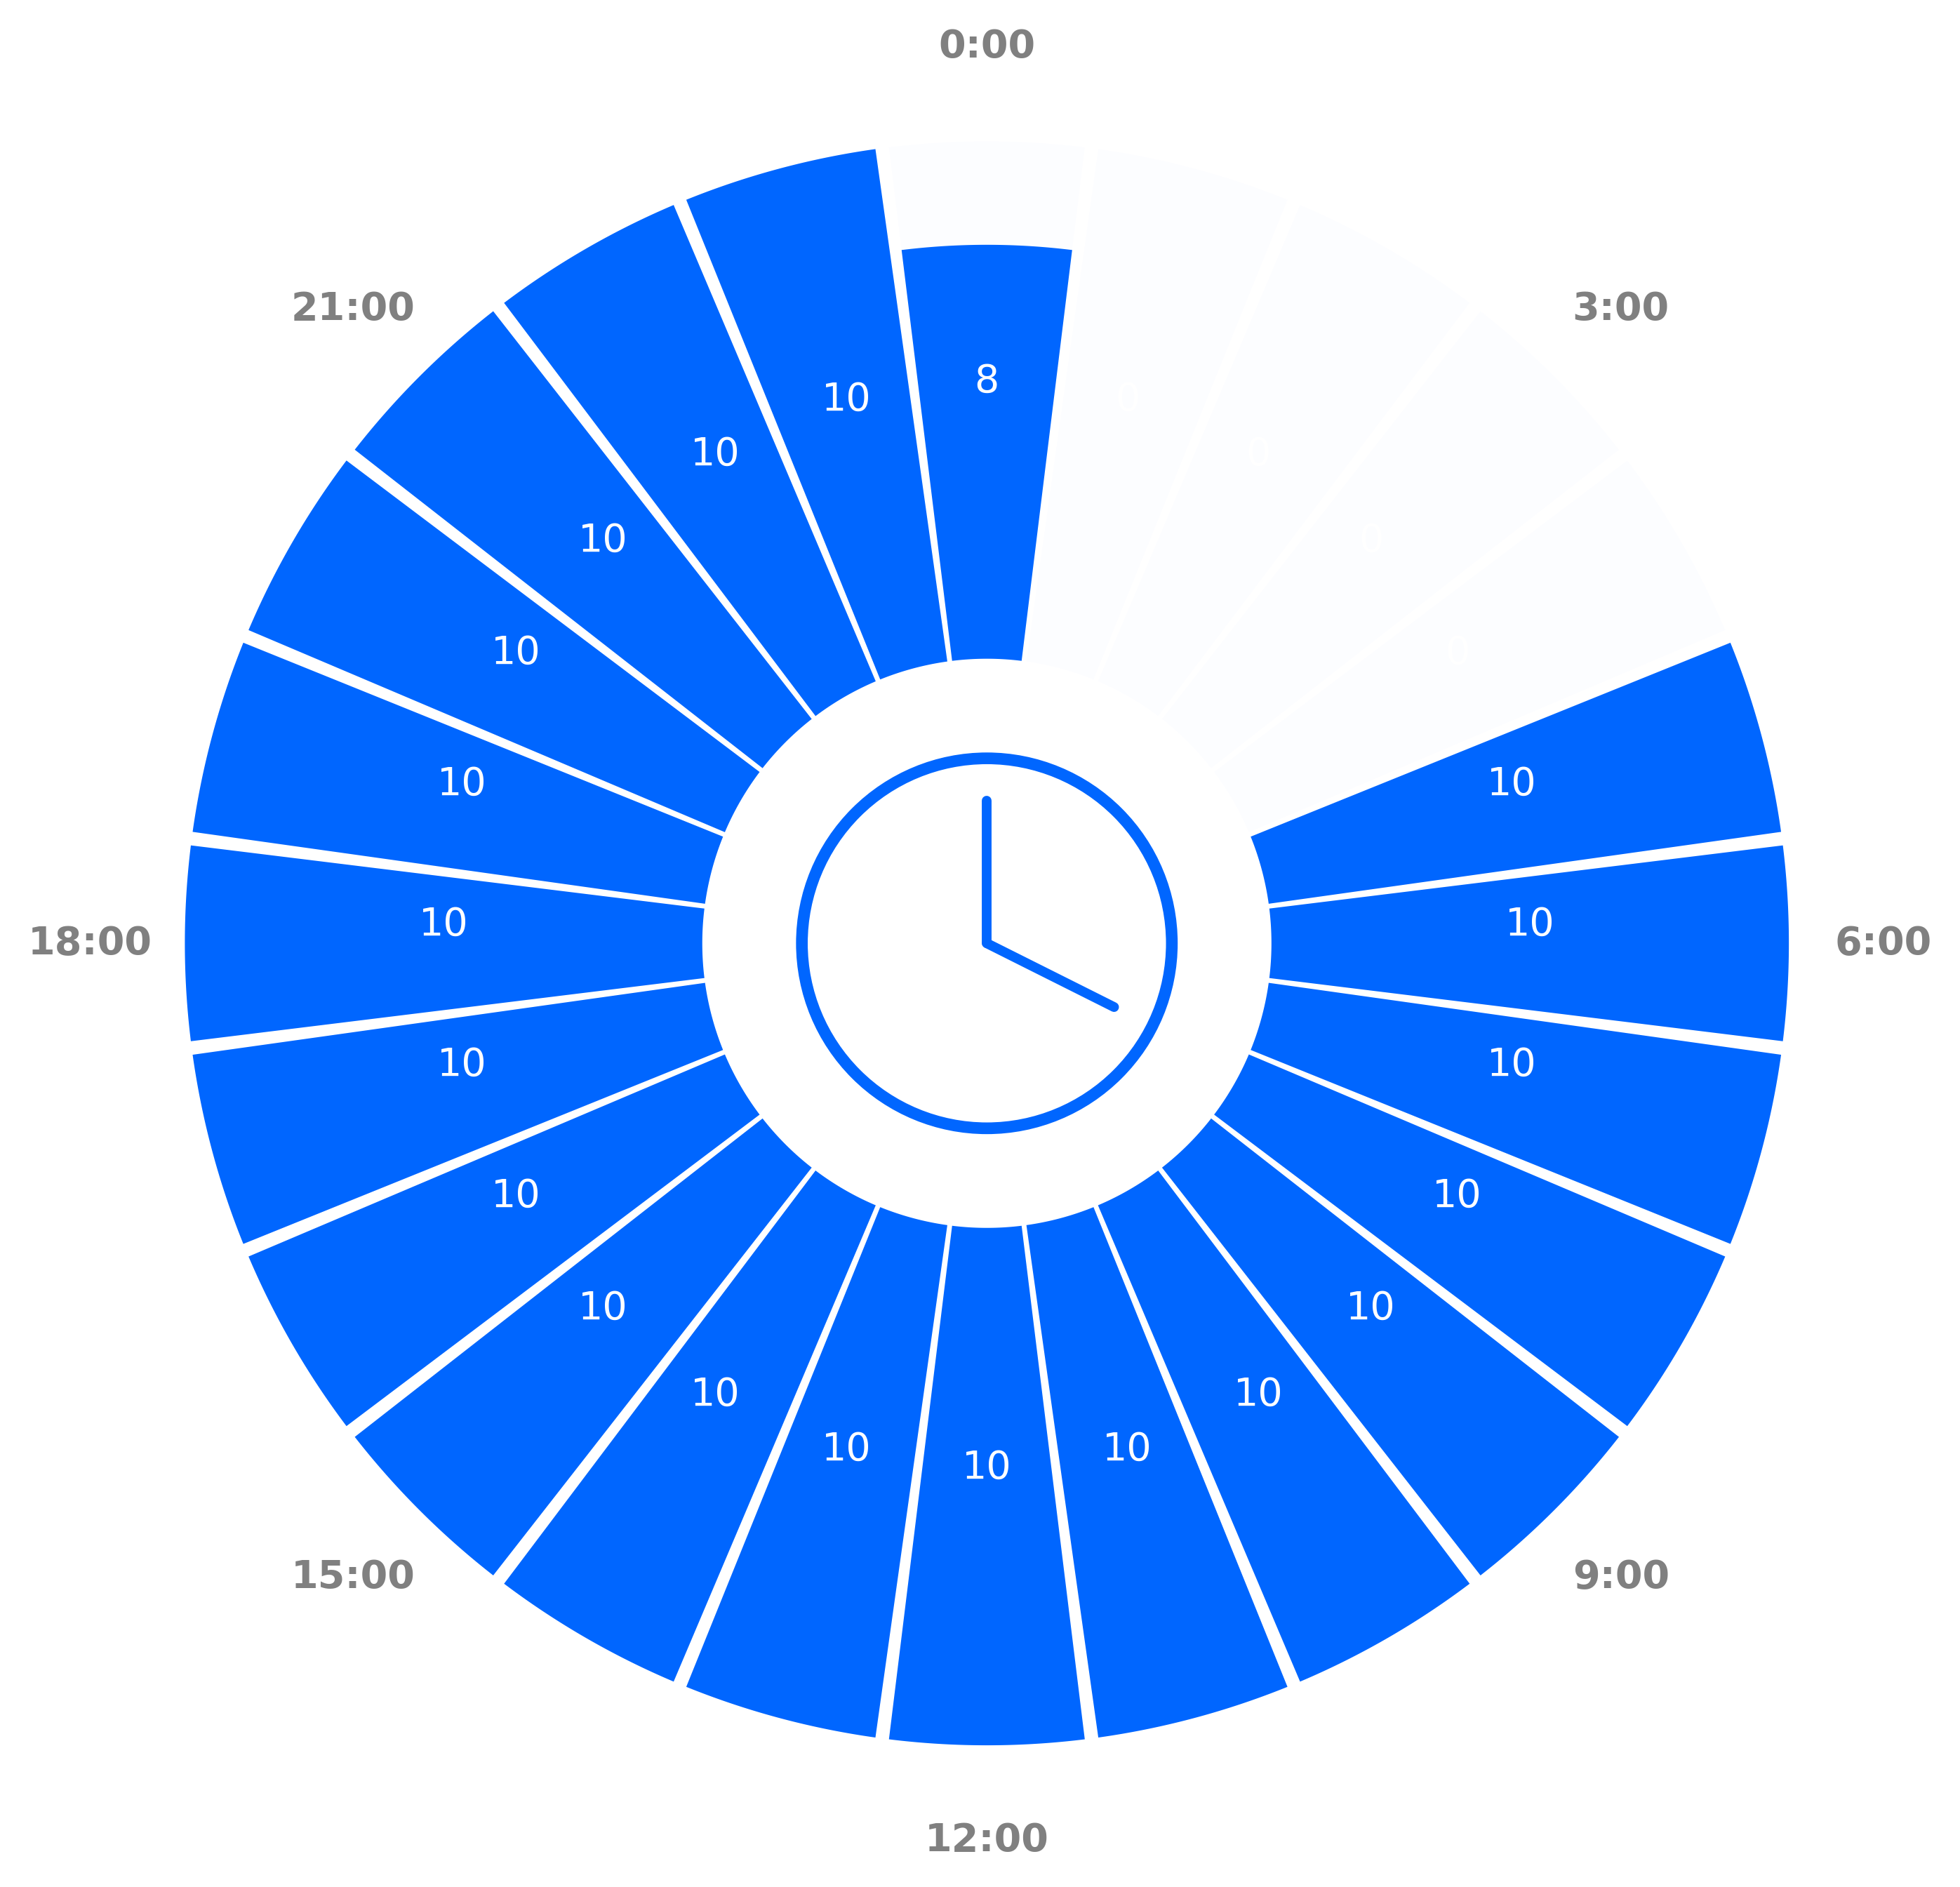

In [91]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours), which is accounted for with padding
procCounts = df.groupby('Hour')['Procedure'].nunique() #height of bars is the number of procedures started in that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 0.55*max(procCounts) # size of the inner circle


fig = plt.figure(figsize=(8,8), dpi=400, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars = ax.bar(theta, max(procCounts), width=width, bottom=bottom, color="#0066ff", alpha=0.01) #set background wedge color

rotations = [np.degrees(i) for i in theta]
for i in rotations: i = int(i)
for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    if bar.get_height() > 1:
         height = bottom+(bar.get_height()/2)
         ax.text(x, height, label, ha='center', va='bottom', color='white', fontweight='normal')

#for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
#    lab = ax.text(x,bottom+bar.get_height() , label, 
#             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])


## write 0,3,6,9,12,15,18,21:00 around the circle
ticks = [f"{i}:00" for i in range(0, 24, 3)]
ax.set_xticklabels(ticks, color='grey', fontweight='bold')

## Draw a "clock" icon inside of the graph
##lines for hands of a clock
x1, y1 = [0, 90], [0, 0.5*bottom]
x2, y2 = [0,0], [0, 0.5*bottom]
plt.plot(x1, y1, x2, y2, linewidth=2.5, solid_capstyle='round', color='#0066ff', alpha=1)

##circle for clockface
circle = pl.Circle((0, 0), 0.65*bottom, transform=ax.transData._b, linewidth=3, fill=False, color="#0066ff", alpha=1)
ax.add_artist(circle)
##

plt.axis('on')

plt.savefig('radialBarPlot.png')

In [92]:
clockNumbers = [f"{i:02d}" for i in range(0, 24, 6)]

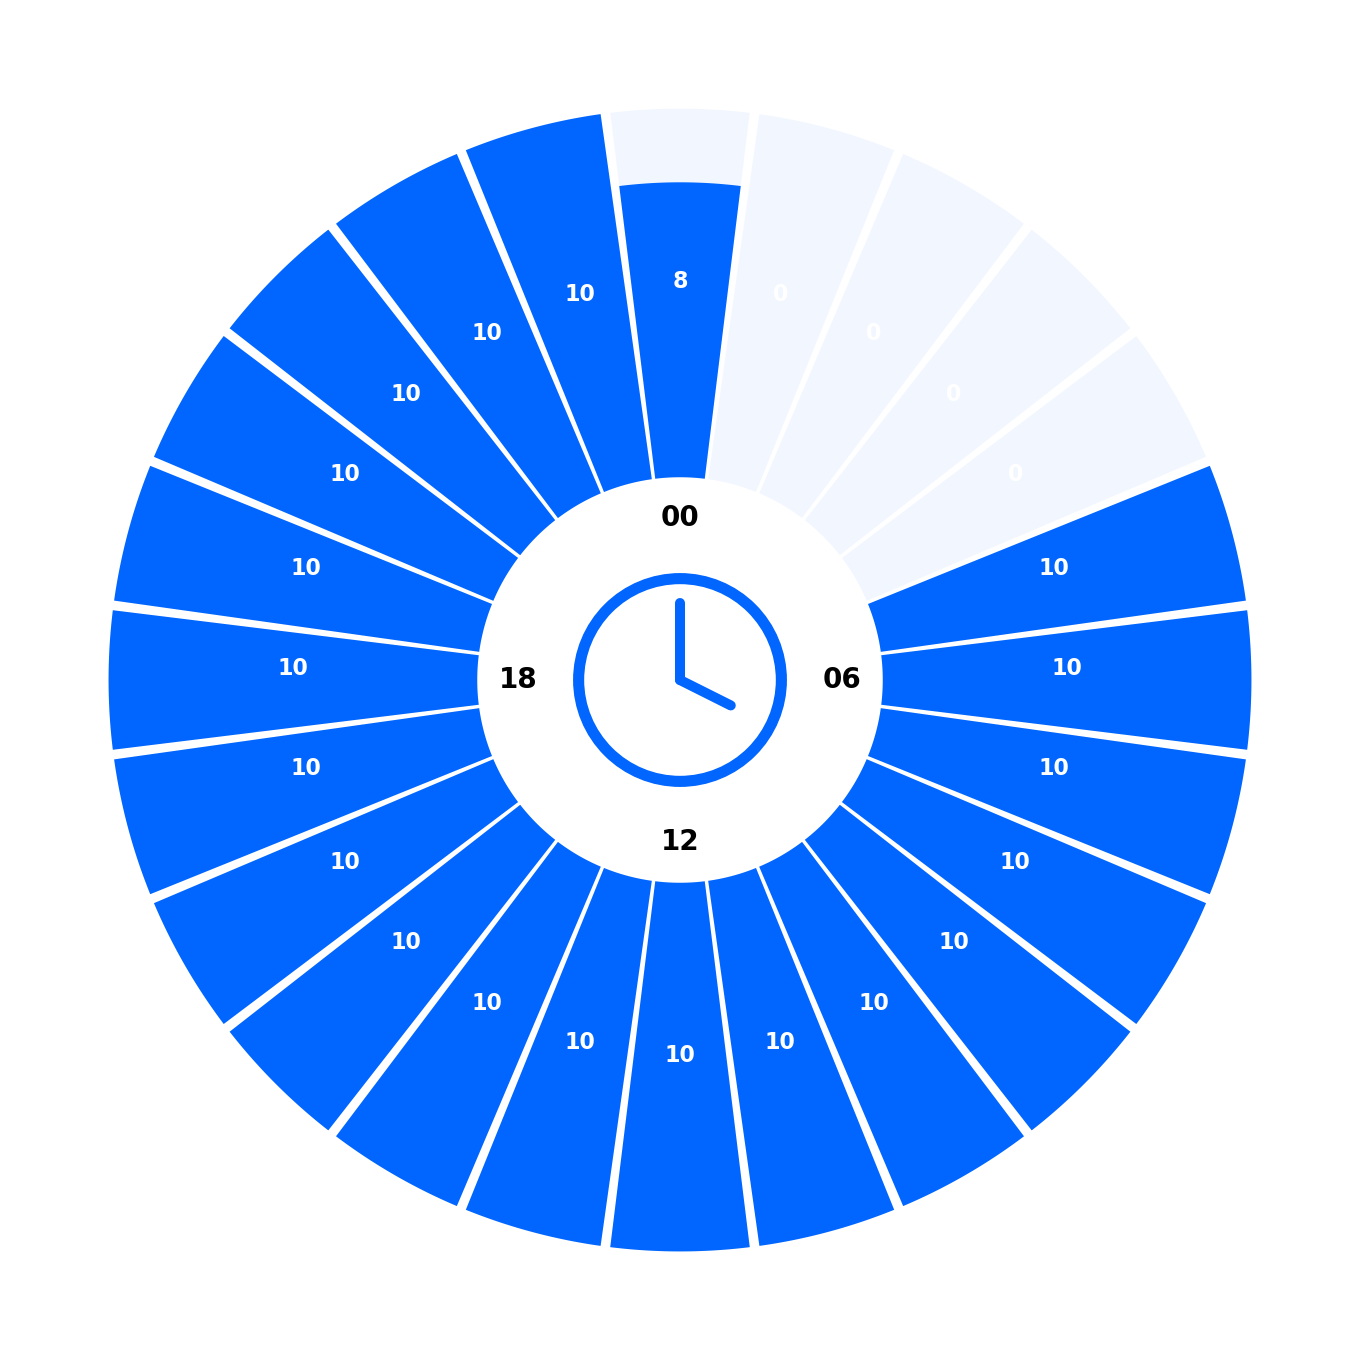

In [93]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours), which is accounted for with padding
procCounts = df.groupby('Hour')['Procedure'].nunique() #height of bars is the number of procedures started in that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 0.55*max(procCounts) # size of the inner circle


fig = plt.figure(figsize=(2,2), dpi=800, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars = ax.bar(theta, max(procCounts), width=width, bottom=bottom, color="#0066ff", alpha=0.05) #set background wedge color

rotations = [np.degrees(i) for i in theta]
for i in rotations: i = int(i)
for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    if bar.get_height() > 1:
         height = bottom+(bar.get_height()/2)
         ax.text(x, height, label, ha='center', va='bottom', color='white', fontsize='2', fontweight='bold')

#for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
#    lab = ax.text(x,bottom+bar.get_height() , label, 
#             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

## Draw a "clock" icon inside of the graph
##lines for hands of a clock
x1, y1 = [0, 90], [0, 0.28*bottom]
x2, y2 = [0,0], [0, 0.38*bottom]
plt.plot(x1, y1, x2, y2, linewidth=.90, solid_capstyle='round', color='#0066ff', alpha=1)

##circle for clockface
circle = pl.Circle((0, 0), 0.5*bottom, transform=ax.transData._b, linewidth=1, fill=False, color="#0066ff", alpha=1)
ax.add_artist(circle)
##

#00, 06, 12, 18 labels for clockface
plt.text(0, bottom*.80, "00", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(bottom*.80, 0, "06", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(0, -bottom*.80, "12", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(-bottom*.80, 0, "18", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')

ax.set_xticklabels('')

plt.axis('on')

plt.savefig('radialBarPlot2.png')

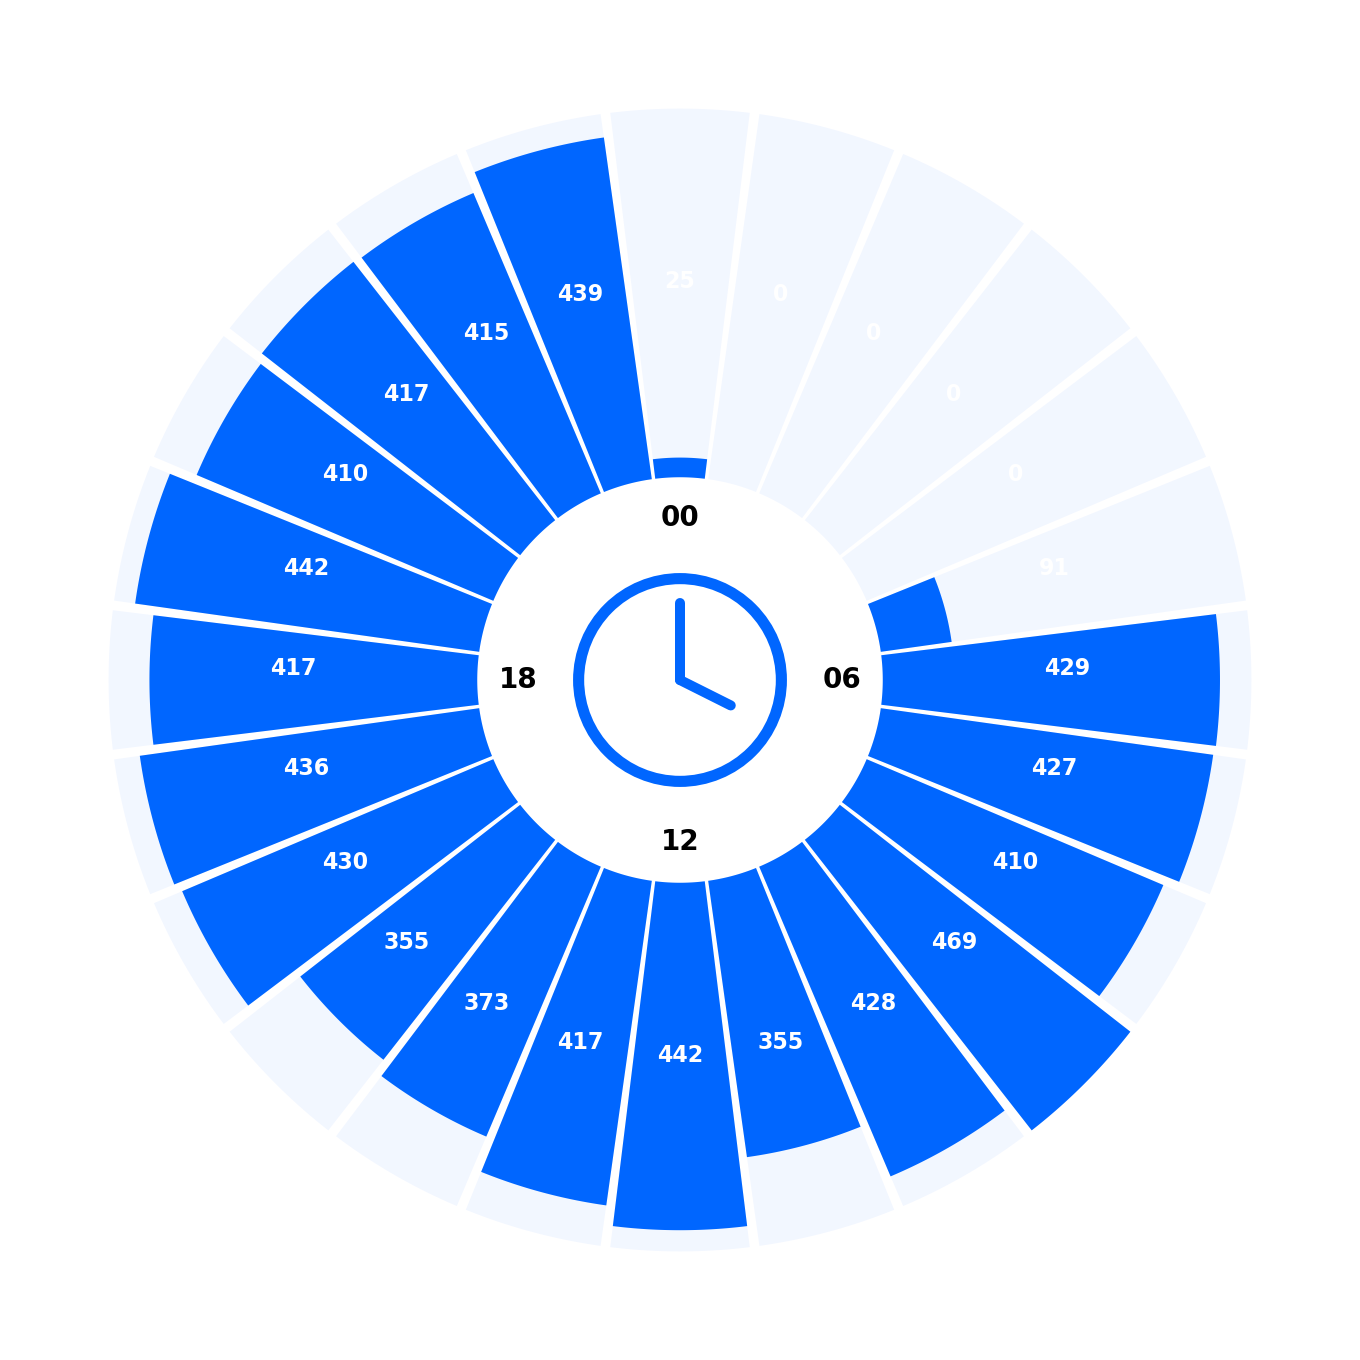

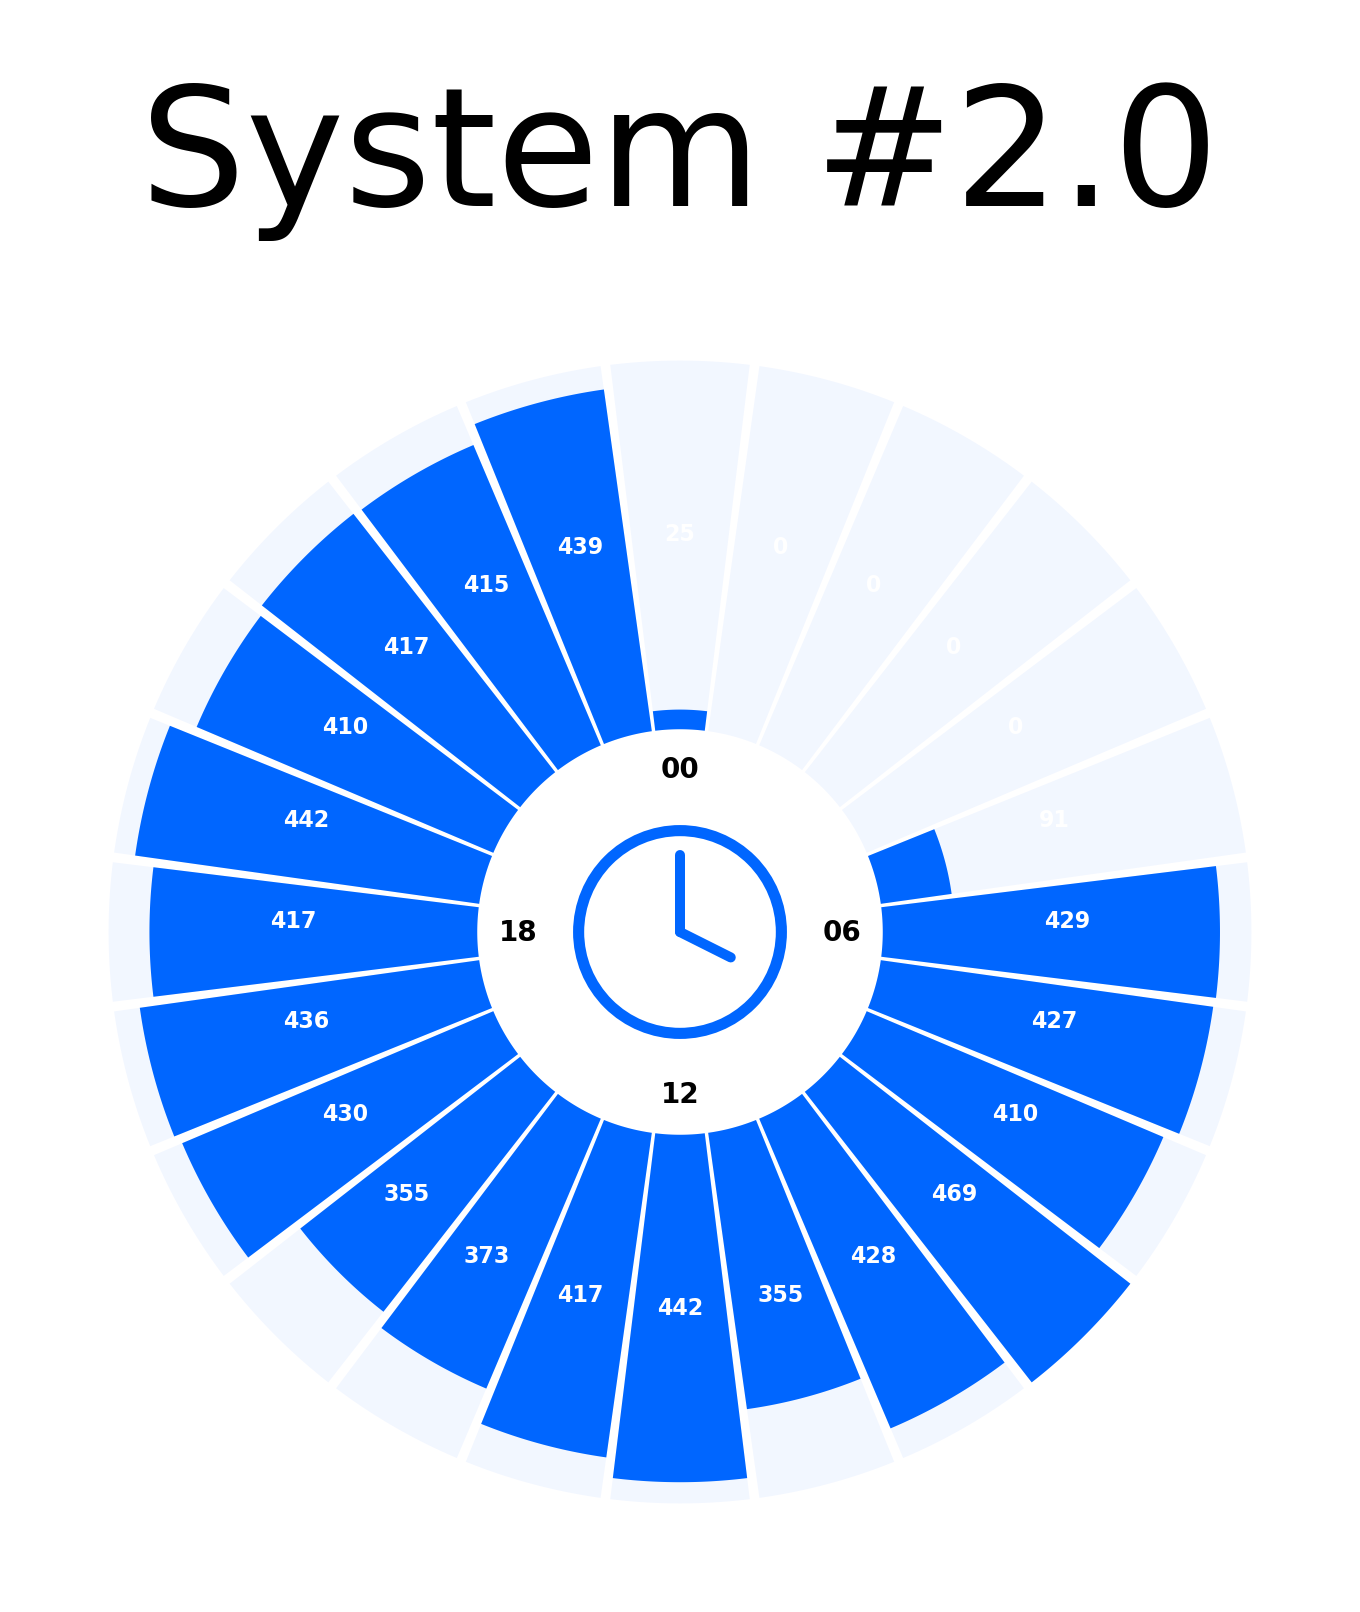

In [107]:

grouped = df.groupby('System')
for name,group in grouped:
    wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours), which is accounted for with padding
    procCounts = df.groupby('Hour')['Procedure'].count() #height of bars is the number of procedures started in that hour

    theta=np.arange(0,2*np.pi,2*np.pi/wedges)
    width = (2.2*np.pi)/wedges *.85
    bottom = 0.55*max(procCounts) # size of the inner circle


    fig = plt.figure(figsize=(2,2), dpi=800, facecolor='w')
    ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


    bars = ax.bar(theta, max(procCounts), width=width, bottom=bottom, color="#0066ff", alpha=0.05) #set background wedge color

    rotations = [np.degrees(i) for i in theta]
    for i in rotations: i = int(i)
    for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
        if bar.get_height() > 1:
             height = bottom+(bar.get_height()/2)
             ax.text(x, height, label, ha='center', va='bottom', color='white', fontsize='2', fontweight='bold')

    #for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    #    lab = ax.text(x,bottom+bar.get_height() , label, 
    #             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

    group.plot.bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

    N = len(procCounts)

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(False)
    ax.spines['polar'].set_visible(False)
    ax.set_rticks([])

    ## Draw a "clock" icon inside of the graph
    ##lines for hands of a clock
    x1, y1 = [0, 90], [0, 0.28*bottom]
    x2, y2 = [0,0], [0, 0.38*bottom]
    plt.plot(x1, y1, x2, y2, linewidth=.90, solid_capstyle='round', color='#0066ff', alpha=1)

    ##circle for clockface
    circle = pl.Circle((0, 0), 0.5*bottom, transform=ax.transData._b, linewidth=1, fill=False, color="#0066ff", alpha=1)
    ax.add_artist(circle)
    ##

    #00, 06, 12, 18 labels for clockface
    plt.text(0, bottom*.80, "00", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
    plt.text(bottom*.80, 0, "06", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
    plt.text(0, -bottom*.80, "12", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
    plt.text(-bottom*.80, 0, "18", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')

    ax.set_xticklabels('')

    plt.axis('on')
plt.title('System #'+str(name),fontsize=15)
plt.show()

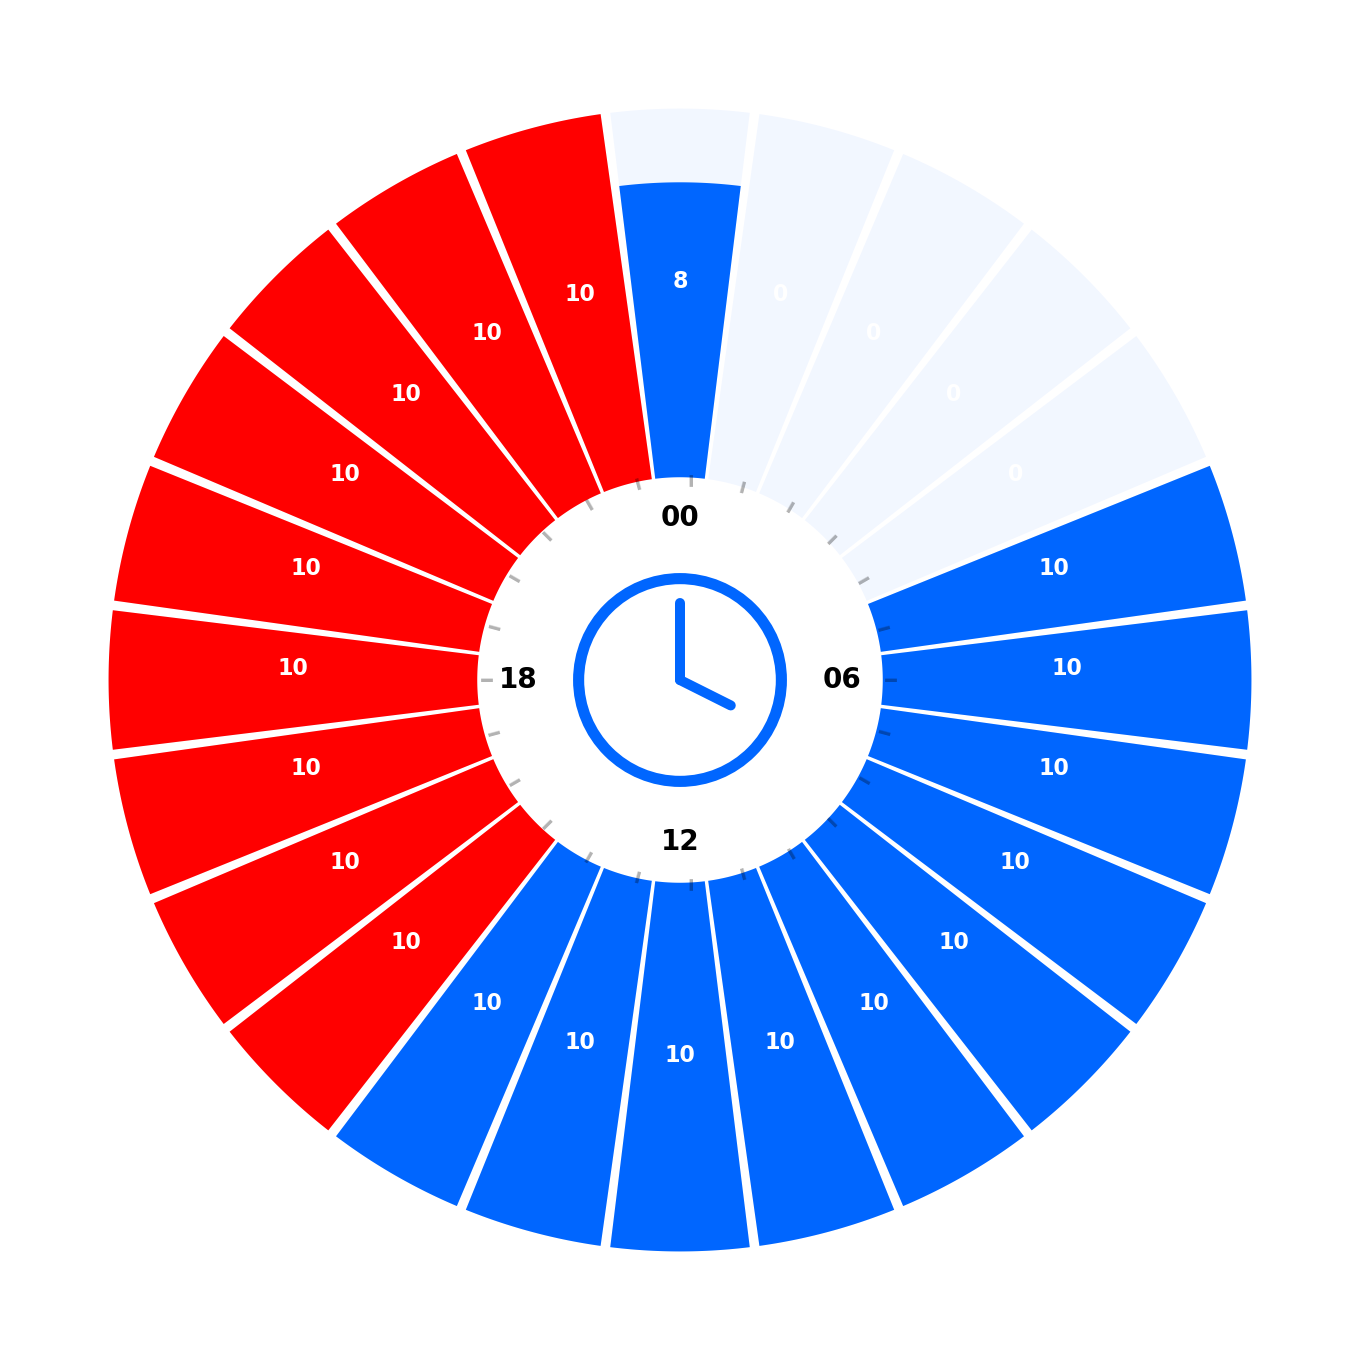

In [14]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours), which is accounted for with padding
procCounts = df.groupby('Hour')['Procedure'].nunique() #height of bars is the number of procedures started in that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 0.55*max(procCounts) # size of the inner circle


fig = plt.figure(figsize=(2,2), dpi=800, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars = ax.bar(theta, max(procCounts), width=width, bottom=bottom, color="#0066ff", alpha=0.05) #set background wedge color

rotations = [np.degrees(i) for i in theta]
for i in rotations: i = int(i)
for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    if bar.get_height() > 1:
         height = bottom+(bar.get_height()/2)
         ax.text(x, height, label, ha='center', va='bottom', color='white', fontsize='2', fontweight='bold')

#for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
#    lab = ax.text(x,bottom+bar.get_height() , label, 
#             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

#my_colors = ['#0066ff', '#ff0000']

my_colors = []
for x in range(15):
    my_colors.append('#0066ff')
for x in range(9):
    my_colors.append('#ff0000')


bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color=my_colors) #wedges by hour






N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

## Draw a "clock" icon inside of the graph
##lines for hands of a clock
x1, y1 = [0, 90], [0, 0.28*bottom]
x2, y2 = [0,0], [0, 0.38*bottom]
plt.plot(x1, y1, x2, y2, linewidth=.90, solid_capstyle='round', color='#0066ff', alpha=1)

##circle for clockface
circle = pl.Circle((0, 0), 0.5*bottom, transform=ax.transData._b, linewidth=1, fill=False, color="#0066ff", alpha=1)
ax.add_artist(circle)
##

#00, 06, 12, 18 labels for clockface
plt.text(0, bottom*.80, "00", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(bottom*.80, 0, "06", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(0, -bottom*.80, "12", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(-bottom*.80, 0, "18", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')



def kex(N):
    alpha=2*np.pi/N
    alphas = alpha*np.arange(N)
    coordX = np.cos(alphas)
    coordY = np.sin(alphas)

    return np.c_[coordX, coordY, alphas]

N = wedges
r = bottom*.995
points = kex(N)
#ax.scatter(points[:,0], points[:,1])

for i in range(0,N):
    a = points[i,2] 
    x,y = (r*np.cos(a)+width, r*np.sin(a))
    if points[i,0] < 0: a = a - np.pi
    ax.text(x,y, "-", rotation = np.rad2deg(a), transform=ax.transData._b, ha="center", va="center", 
            size='4', weight='ultralight', alpha=0.3
                   )

ax.set_xticklabels('')

plt.axis('on')

plt.savefig('radialBarPlot2.png')

In [ ]:
my_colors

In [ ]:
my_colors[0]

In [ ]:
print(len(my_colors))

In [ ]:
theta

In [ ]:
bars

In [ ]:
procCounts

In [ ]:
procCounts[0]

In [ ]:
procCounts[10]

In [ ]:
procCounts(0)

In [ ]:
procCounts.iloc[15:18]